Computing with Language: Simple Statistics
==========================================

Let us return to our exploration of the ways we can bring our computational resources to bear on large quantities of text. We began this discussion in 1, and saw how to search for words in context, how to compile the vocabulary of a text, how to generate random text in the same style, and so on.

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. 

Before continuing further, you might like to check your understanding of the last section by predicting the output of the following code. You can use the Jupyter Notebook Code Cell to check whether you got it right. If you're not sure how to do this task, it would be a good idea to review the previous section before continuing further.

In [2]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
           'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens

['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']

```{admonition} Your Turn
What output do you expect of `tokens[-2:]?
```

## Frequency Distributions
How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book. One method would be to keep a tally for each vocabulary item. The tally would need thousands of rows (the same size as the vocabulary), and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of `Moby Dick`:

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
fdist1 = FreqDist(text1)
print(fdist1)

<FreqDist with 19317 samples and 260819 outcomes>


In [5]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]


The tally is known as a frequency distribution, and it tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:

When we first invoke FreqDist, we pass the name of the text as an argument. We can inspect the total number of words ("outcomes") that have been counted up — 260,819 in the case of `Moby Dick`. The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text with a raw count of each word.

```{admonition} Your Turn
Try the preceding frequency distribution example for yourself, for `text2`. Be careful to use the correct parentheses and uppercase letters. If you get an error message NameError: name 'FreqDist' is not defined, you need to start your work with from nltk.book import *
```

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, whale, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using `fdist1.plot(50, cumulative=True)`, to produce the following graph. These 50 words account for nearly half the book!

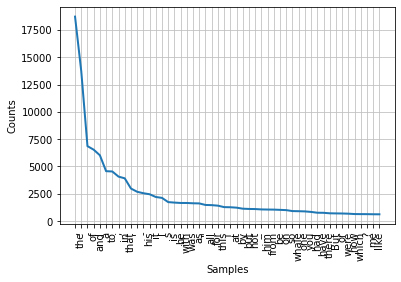

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
# The frequency distribution
fdist1.plot(50)

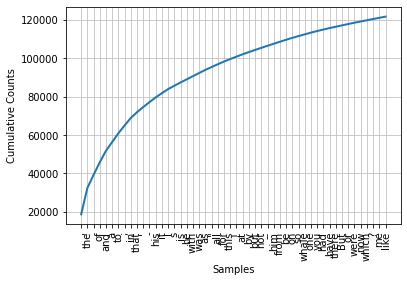

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [13]:
fdist1.plot(50, cumulative=True)

From the Cumulative Frequency Plot for 50 Most Frequently Words in `Moby Dick`: these account for nearly half of the tokens.

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing `fdist1.hapaxes()`. This list contains `lexicographer`, `cetological`, `contraband`, `expostulations`, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

In [14]:
fdist1.hapaxes()

['Herman',
 'Melville',
 ']',
 'ETYMOLOGY',
 'Late',
 'Consumptive',
 'School',
 'threadbare',
 'lexicons',
 'mockingly',
 'flags',
 'mortality',
 'signification',
 'HACKLUYT',
 'Sw',
 'HVAL',
 'roundness',
 'Dut',
 'Ger',
 'WALLEN',
 'WALW',
 'IAN',
 'RICHARDSON',
 'KETOS',
 'GREEK',
 'CETUS',
 'LATIN',
 'WHOEL',
 'ANGLO',
 'SAXON',
 'WAL',
 'HWAL',
 'SWEDISH',
 'ICELANDIC',
 'BALEINE',
 'BALLENA',
 'FEGEE',
 'ERROMANGOAN',
 'Librarian',
 'painstaking',
 'burrower',
 'grub',
 'Vaticans',
 'stalls',
 'higgledy',
 'piggledy',
 'gospel',
 'promiscuously',
 'commentator',
 'belongest',
 'sallow',
 'Pale',
 'Sherry',
 'loves',
 'bluntly',
 'Subs',
 'thankless',
 'Hampton',
 'Court',
 'hie',
 'refugees',
 'pampered',
 'Michael',
 'Raphael',
 'unsplinterable',
 'GENESIS',
 'JOB',
 'JONAH',
 'punish',
 'ISAIAH',
 'soever',
 'cometh',
 'incontinently',
 'perisheth',
 'PLUTARCH',
 'MORALS',
 'breedeth',
 'Whirlpooles',
 'Balaene',
 'arpens',
 'PLINY',
 'Scarcely',
 'TOOKE',
 'LUCIAN',
 'TRUE',


## Fine-grained Selection of Words

Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property `P`, so that `P(w)` is true if and only if `w` is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in {math:numref}`set`. This means "the set of all `w` such that `w` is an element of `V` (the vocabulary) and `w` has property `P`".

```{math} {w | w \in V & P(w)}
---
label: set
---
```

[w for w in V if p(w)]

The corresponding Python expression is given in 

```
[w for w in V if p(w)]
```

Note that it produces a list, not a set, which means that duplicates are possible. Observe how similar the two notations are. Let's go one more step and write executable Python code:

In [15]:
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

```{admonition} Your Turn
Try out the previous statements in the Jupyter Notebook, and experiment with changing the text and changing the length condition. Does it make a difference to your results if you change the variable names, e.g., using `[word for word in vocab if ...]`?
```

Let's return to our task of finding words that characterize a text. Notice that the long words in `text4` reflect its national focus — constitutionally, transcontinental — whereas those in `text5` reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often *hapaxes* (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [10]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: `len(w) > 7` ensures that the words are longer than seven letters, and `fdist5[w] > 7` ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece of code, processing tens of thousands of words, produces some informative output.

## Collocations and Bigrams
A collocation is a sequence of words that occur together unusually often. Thus `red wine` is a collocation, whereas `the wine` is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, `maroon wine` sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function `bigrams()`:

In [17]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

If you omitted list() above, and just typed bigrams(['more', ...]), you would have seen output of the form <generator object bigrams at 0x10fb8b3a8>. This is Python's way of saying that it is ready to compute a sequence of items, in this case, bigrams. For now, you just need to know to tell Python to convert it into a list, using list().

Here we see that the pair of words `than-done` is a bigram, and we write it in Python as ('than', 'done'). Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The collocations() function does this for us. We will see how it works later.

In [11]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; Old World; Almighty God; Fellow citizens; Chief
Magistrate; every citizen; one another; fellow Americans; Indian
tribes; public debt; foreign nations


In [12]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


The collocations that emerge are very specific to the genre of the texts. In order to find red wine as a collocation, we would need to process a much larger body of text.

##  Counting Other Things
Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:

In [14]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)

<FreqDist with 19 samples and 260819 outcomes>


In [15]:
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

We start by deriving a list of the lengths of words in text1, and the FreqDist then counts the number of times each of these occurs. The result is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. That is, there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:

In [16]:
fdist.most_common()

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [17]:
fdist.max()

3

In [18]:
fdist[3]

50223

In [19]:
fdist.freq(3)

0.19255882431878046

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

3.1 summarizes the functions defined in frequency distributions.

```{list-table} Functions Defined for NLTK's Frequency Distributions
:header-rows: 1

* - Example
  - Description
* - fdist = FreqDist(samples)	
  - create a frequency distribution containing the given samples
* - fdist[sample] += 1	
  - increment the count for this sample
* - fdist['monstrous']	
  - count of the number of times a given sample occurred
* - fdist.freq('monstrous')	
  - frequency of a given sample
* - fdist.N()	
  - total number of samples
* - fdist.most_common(n)	
  - the n most common samples and their frequencies
* - for sample in fdist:	
  - iterate over the samples
* - fdist.max()	
  - sample with the greatest count
* - fdist.tabulate()	
  - tabulate the frequency distribution
* - fdist.plot()	
  - graphical plot of the frequency distribution
* - fdist.plot(cumulative=True)	
  - cumulative plot of the frequency distribution
* - fdist1 |= fdist2	
  - update fdist1 with counts from fdist2
* - fdist1 < fdist2	
  - test if samples in fdist1 occur less frequently than in fdist2
```
Our discussion of frequency distributions has introduced some important Python concepts, and we will look at them systematically.
